In [50]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from plotting import EfficientFrontier,plot_covariance,plot_efficient_frontier
from finrl.config_tickers import DOW_30_TICKER,NAS_100_TICKER,HSI_50_TICKER,DAX_30_TICKER,SP_500_TICKER
from pypfopt import risk_models
from plotting import EfficientFrontier,plot_covariance,plot_efficient_frontier
from pypfopt import risk_models
from pypfopt import expected_returns
import scienceplots
%matplotlib inline


In [51]:
dow30 = pd.read_csv('./data/dow.csv')
prices = dow30.pivot(index='date',values='close',columns='tic')
prices = prices.dropna(how="all")

In [52]:
prices = prices.drop(['NKE', 'PG', 'TRV', 'UNH', 'VZ', 'WBA', 'WMT', 'CSCO', 'GS', 'CRM', 'CVX', 'DIS', 'HD', 'HON','KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'V'],axis=1)

In [53]:
sample_cov = risk_models.sample_cov(prices, frequency=252)
mean_returns = expected_returns.capm_return(prices)


In [54]:
prices.columns

Index(['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'DOW', 'IBM', 'INTC', 'JNJ', 'JPM'], dtype='object', name='tic')

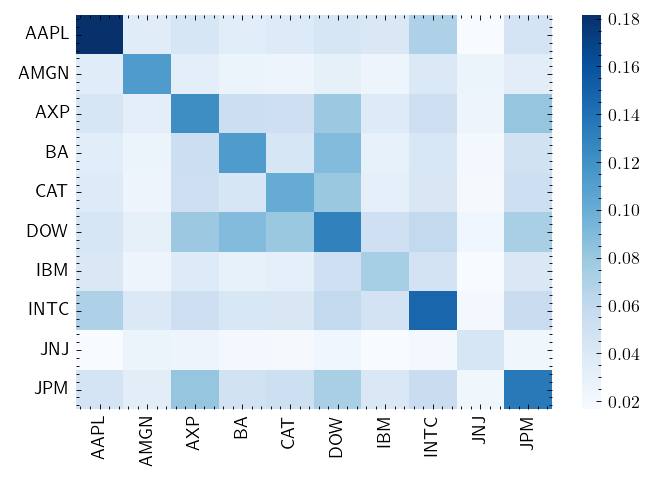

In [57]:
import seaborn as sns
with plt.style.context('science','ieee'):
    fig, ax = plt.subplots(figsize=(6,4),dpi=128)
    S = risk_models.sample_cov(prices)
    sns.heatmap(S,ax=ax,cmap="Blues")
    ax.set_ylabel('')    
    ax.set_xlabel('')
